<a href="https://colab.research.google.com/github/JakubPyt/Medical_Data_Visualizer/blob/main/Page_View_Time_Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Page View Time Series Visualizer

This project was created as part of the course on the free Code Camp website:

https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer

In this project I visualize time series data using a line chart, bar chart, and box plots. I use pandas, matplotlib, and seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. 

## Basic dataset

In [2]:
# Import of needed libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import the data 
url = 'https://raw.githubusercontent.com/JakubPyt/Page_View_Time_Series_Visualizer/main/fcc-forum-pageviews.csv'
data = pd.read_csv(url, sep=';', index_col='date')

# Display first five rows
data.head()

,value
date,
09.05.2016,1201
10.05.2016,2329
11.05.2016,1716
12.05.2016,10539
13.05.2016,6933


## Cleaning data

Cleaning the data by filtering out days when the page views were 2.5% on the top or 2.5% of bottom dataset.

In [ ]:
# Create copy of basic data
df = data.copy()

# Filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset
df = df.drop(df.loc[(df.value < df.value.quantile(0.025)) | (df.value > df.value.quantile(0.975))].index)

## Line Plot: Daily freeCodeCamp Forum Page Views 5/2016-12/2019

Requirements:
- The label on the x axis should be "Date".
- The label on the y axis should be "Page Views".
- The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019".
- Use Matplotlib to draw a line chart.
- Plots should show daily freeCodeCamp Forum Page Views 5/2016-12/2019.

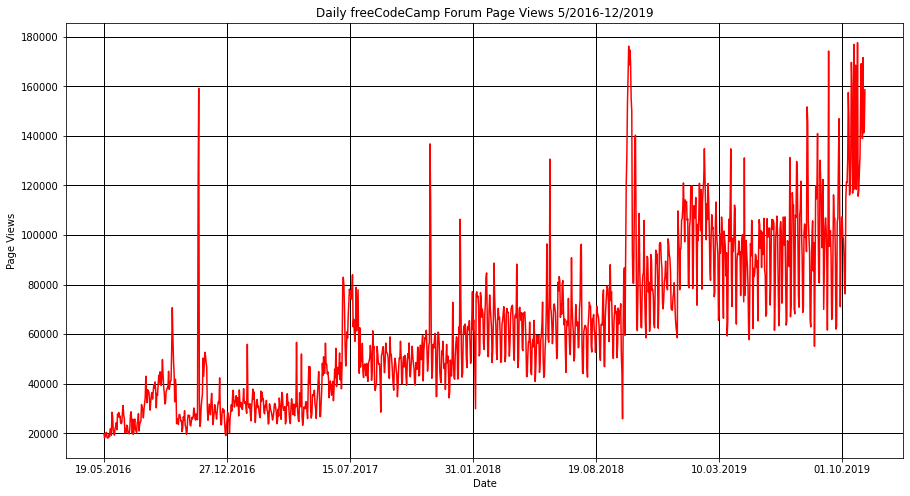

In [ ]:
# Create figure for plot
fig, ax = plt.subplots(figsize=(15,8))

# Create plot
ax.plot(
    df.index,  # X - date is the index
    df.value,  # Y - number of page views each day
    color='red'  # Color of plot
)

# Additional settings
ax.set(
    xlabel='Date',  # Title of x label 
    ylabel='Page Views',  # Title of y label
    title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019',  # Title of plot 
    facecolor='white',  # Color inside the figure
)

# Line below set number of values on x label
ax.xaxis.set_major_locator(plt.MaxNLocator(8))  

# Display grid
ax.grid(
    color='black',  
    linestyle='-',  
    linewidth=1
)
plt.show()

## Bar Plot: Average daily page views for each month grouped by year

Requirements:
 - Plot should show average daily page views for each month grouped by year.
 - The legend should show month labels and have a title of "Months".
 - The label on the x axis should be "Years".
 - The label on the y axis should be "Average Page Views"

In [ ]:
# First I need to rebuild dataset to more useful form
df_bar = df.copy()

# Change index of dataset to datetime dtype
df_bar.index = pd.to_datetime(df_bar.index)

# Add column Year with only year from datetime index
df_bar['Year'] = df_bar.index.year

# Add column Months with only month number from datetime index
df_bar['Months'] = df_bar.index.month

# Create pivot table
df_bar = df_bar.pivot_table(
    index='Year',  # With year as index
    columns='Months',  # With month numbers as columns
    values='value',  
    aggfunc=np.mean  # And with daily average page views for each month
)

# And change number of month to full month name
df_bar = df_bar.rename(columns=lambda month: pd.to_datetime(month, format='%m').month_name())
df_bar

Months,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2016,32954.833333,31838.333333,29222.833333,29929.666667,24993.545455,23758.727273,24558.652174,32791.576923,38499.600000,29471.720000,40226.458333,27874.400000
2017,35360.096774,34740.214286,34302.548387,36625.333333,38596.741935,43772.166667,58529.451613,44904.516129,44812.533333,45289.483871,54077.900000,45756.870968
2018,57866.193548,65091.962963,62594.483871,61587.933333,64467.000000,69043.566667,65649.064516,67390.032258,66101.366667,100171.344828,77890.400000,78255.838710
2019,102582.290323,102123.481481,98937.322581,91769.000000,96874.413793,89267.320000,94134.607143,103596.266667,100070.896552,115110.200000,123875.388889,103512.500000


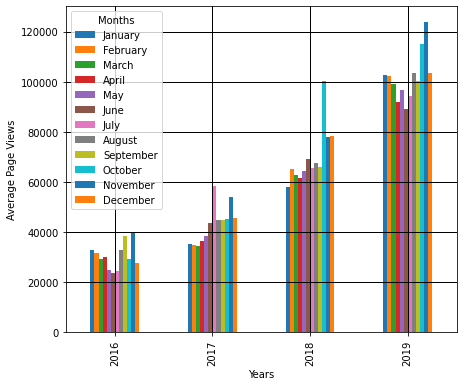

In [ ]:
# Create bar plot based on dataset from previous cell
ax = df_bar.plot(kind="bar")

# Get figure to set its size
fig = ax.get_figure()
fig.set_size_inches(7,6)

# Additional settings
ax.set(
    xlabel='Years',  # Title of x label 
    ylabel='Average Page Views',  # Title of y label
    facecolor='white',  # Color inside the figure
)

# Display grid
ax.grid(
    color='black', 
    linestyle='-', 
    linewidth=1
)

plt.show()

## Box Plot: Trend and Seasonality

Requirements:
 - Use Searborn. 
 - Draw two adjacent box plots.
 - These box plots should show how the values are distributed within a given year or month and how it compares over time.
 - The title of the first chart should be "Year-wise Box Plot (Trend)".
 - The title of the second chart should be "Month-wise Box Plot (Seasonality)".


In [ ]:
# Prepare data for box plots 
df_box = df.copy()

# Change index of dataset to datetime dtype
df_box.index = pd.to_datetime(df_box.index)

# After line below, date is column and the index is int now
df_box.reset_index(inplace=True)

# Create columns 'year' and 'month' based on column 'data'
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box

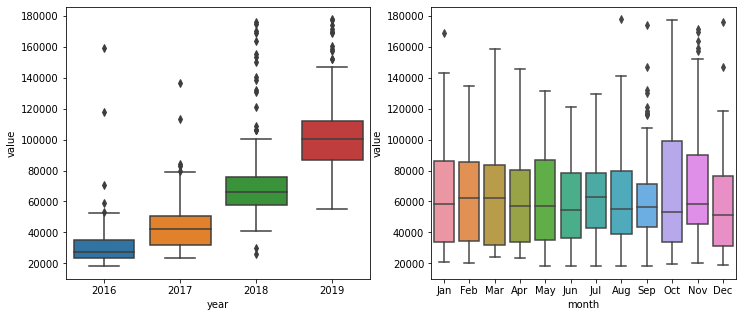

In [ ]:
# Create figure with place for two plots
fig, ax = plt.subplots(1,2, figsize=(12,5))

# Create plot 1 - by year
sns.boxplot(
    x = df_box.year, 
    y = df_box.value,
    data = df_box,
    ax = ax[0]  
)

# Create plot 2 - by months
sns.boxplot(
    x = df_box.month,
    y = df_box.value,
    data = df_box,
    order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    ax=ax[1]
)
plt.show()